# DFS with Iterative Deepning and Alpha Beta pruning 


The fundamental building blocks of computer science are data structures and algorithms, which offer a methodical approach to problem-solving and effective data processing. Three methods stand out among the numerous employed in these fields: depth first search, iterative deepening, and alpha-beta pruning.

A fundamental algorithm for navigating a graph or tree structure is called depth first search. Before turning around, it follows each branch as far as it can go. This method, which can be applied iteratively or recursively, is very helpful when looking for paths or solutions.

A kind of depth first search known as iterative deepening restricts the depth of investigation on each iteration, gradually raising the limit until a solution is found. When memory limits hinder thorough exploration and the search space's depth is unknown or limitless, this method is helpful.

In game-playing software, an algorithm called alpha-beta pruning is used to cut down on the number of nodes that are considered during a minimax search. Based on the evaluation of a heuristic function, it prunes the search tree to leave only those branches that are likely to produce a better result. The search space can be greatly reduced with this method, which also enhances the efficiency of game-playing algorithms.

These three strategies will be thoroughly examined in this article, along with their use, implementation, and performance characteristics. We'll also look at how they work best when combined to effectively tackle difficult issues.

# Depth First Search (DFS)


*Depth-first search is an algorithm for traversing or searching tree or graph data structures. The algorithm starts at the root node (selecting some arbitrary node as the root node in the case of a graph) and explores as far as possible along each branch before backtracking.*

*So the basic idea is to start from the root or any arbitrary node and mark the node and move to the adjacent unmarked node and continue this loop until there is no unmarked adjacent node. Then backtrack and check for other unmarked nodes and traverse them. Finally, print the nodes in the path.* [from geeksforgeeks](https://www.geeksforgeeks.org/depth-first-search-or-dfs-for-a-graph/)

## Algorithm



```
Algorithm: DFS(G, v)
Input: 
- G: a graph represented as an adjacency list or matrix
- v: the starting vertex to begin the DFS traversal

Output: a set of visited vertices

1. Mark v as visited
2. Add v to the set of visited vertices
3. For each neighbor w of v in G:
   a. If w is not visited, recursively call DFS(G, w)
4. Return the set of visited vertices

```
As the first step in this algorithm, we add the starting vertex v to the list of visited vertices by designating it as visited. Then, until we have visited all reachable vertices, we recursively explore all unvisited neighbors of v using the same DFS procedure. The set of visited vertices is then returned.

Please take note that the graph is assumed to be represented using an adjacency list in this implementation. The procedure would need to be adjusted if the graph were to be represented as an adjacency matrix.

It's also important to note that there are alternative ways to implement DFS besides this one, such as by using a stack rather than recursion.

## Time Complexity

The time complexity of the Depth First Search algorithm depends on the representation of the graph and the way it is implemented.

For a graph represented as an adjacency matrix with n vertices, the time complexity of DFS is O(n^2) since we need to iterate through each cell in the matrix to determine if there is an edge between vertices.

For a graph represented as an adjacency list with n vertices and m edges, the time complexity of DFS is O(n+m). This is because we visit each vertex and each edge once during the traversal.

In the worst case, when the graph is a complete graph, the number of edges is n(n-1)/2, which is proportional to n^2. Therefore, the time complexity of DFS for a complete graph represented as an adjacency list is O(n^2).

However, in most practical scenarios, the number of edges in a graph is much smaller than n^2, so the time complexity of DFS is generally considered to be O(n+m).

## Working of the Algorithm

Sure, here are two worked examples for Depth First Search:

### Example 1:
Consider the following graph:

```
A ---- B ---- C
|      |      |
D ---- E ---- F
```

Starting from node A, let's perform a Depth First Search on the graph.

```
Step 1: Visit node A and mark it as visited
Step 2: Visit node B and mark it as visited
Step 3: Visit node E and mark it as visited
Step 4: Visit node F and mark it as visited
Step 5: Backtrack to node E and visit node D and mark it as visited
Step 6: Backtrack to node B and visit node C and mark it as visited
Step 7: Backtrack to node A
```

The DFS traversal order would be: A -> B -> E -> F -> D -> C

### Example 2:
Consider the following graph:

```
A ---- B ---- C ---- D
|      |             |
E      F             G
```

Starting from node A, let's perform a Depth First Search on the graph.

```
Step 1: Visit node A and mark it as visited
Step 2: Visit node B and mark it as visited
Step 3: Visit node C and mark it as visited
Step 4: Visit node D and mark it as visited
Step 5: Backtrack to node C and visit node F and mark it as visited
Step 6: Backtrack to node B and visit node E and mark it as visited
Step 7: Backtrack to node A and visit node G and mark it as visited
```

The DFS traversal order would be: A -> B -> C -> D -> F -> E -> G

## Example DFS code

In [2]:
# create the graph as an adjacency list
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}
graph

{'A': ['B', 'C'], 'B': ['D', 'E'], 'C': ['F'], 'D': [], 'E': ['F'], 'F': []}

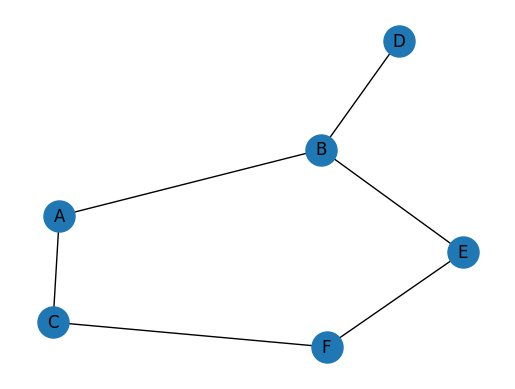

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# create a new graph object
G = nx.Graph()

# add nodes to the graph
for node in graph:
    G.add_node(node)

# add edges to the graph
for node in graph:
    for neighbor in graph[node]:
        G.add_edge(node, neighbor)

# draw the graph
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.show()


In [3]:

# define the DFS algorithm
def dfs(graph, start, target, visited=None):
    if visited is None:
        visited = set()
    print(f"Visiting node '{start}'")
    visited.add(start)
    if start == target:
        return True
    for neighbor in graph[start]:
        if neighbor not in visited:
            if dfs(graph, neighbor, target, visited):
                return True
    return False

# test the DFS algorithm by searching for node 'F'
target = 'F'
start = 'A'
if dfs(graph, start, target):
    print(f"Node '{target}' found in the graph starting from node '{start}'")
else:
    print(f"Node '{target}' not found in the graph starting from node '{start}'")


Visiting node 'A'
Visiting node 'B'
Visiting node 'D'
Visiting node 'E'
Visiting node 'F'
Node 'F' found in the graph starting from node 'A'


# Iterative Deepening

A graph traversal and search procedure called Iterative Deepening is used to determine the shortest path between any two nodes in the graph. Similar to Depth First Search (DFS), it gradually raises the depth limit with each iteration until the target node is located. DFS searches as deeply as feasible in a single branch of the tree.

If the objective node is far down the search tree and DFS takes a long detour first, the algorithm may not find it. In contrast, BFS can locate the target node quickly but may use up a lot of memory, particularly for huge graphs. But by gradually raising the depth limit with each iteration until it reaches the destination node, iterative deepening eliminates these drawbacks.

## Algorithm

Here's the pseudocode for the Iterative Deepening algorithm:

```
function iterative_deepening(start, goal, max_depth):
    for depth_limit = 0 to max_depth:
        visited = empty set
        result = depth_limited_search(start, goal, visited, depth_limit)
        if result is not None:
            return result

function depth_limited_search(node, goal, visited, depth_limit):
    if node is goal:
        return node
    elif depth_limit == 0:
        return None
    else:
        visited.add(node)
        for neighbor in get_neighbors(node):
            if neighbor not in visited:
                result = depth_limited_search(neighbor, goal, visited, depth_limit-1)
                if result is not None:
                    return result
        return None
```

In this pseudocode, the `iterative_deepening` function takes three arguments: the starting node, the goal node, and the maximum depth limit. The function then iterates through a range of depth limits from 0 to the maximum depth limit, and calls the `depth_limited_search` function with each depth limit.

The `depth_limited_search` function takes four arguments: the current node, the goal node, a set of visited nodes, and the depth limit. The function recursively searches for the goal node using DFS, but stops searching a branch if the depth limit is reached. If the goal node is found, the function returns it. Otherwise, it returns None.

By using Iterative Deepening to gradually increase the depth limit with each iteration, this algorithm ensures that it will find the shortest path from the starting node to the goal node, if one exists, while minimizing the memory requirement of the search.

## Time Complexity

Iterative deepening has an O(b^d) time complexity, where d is the depth of the destination node in the search tree and b is the branching factor. This is the same as Depth-First Search's time complexity, which is the algorithm used in Iterative Deepening's 'depth_limited_search' function.

However, Iterative Deepening has a larger actual time complexity than DFS because it does several depth-limited searches. Since the technique conducts d iterations, each with an O(b^d) time complexity, the time complexity of Iterative Deepening is O(b^d) * d. As a result, Iterative Deepening is a more time-intensive search algorithm than DFS, but it is still suitable for the majority of real-world applications.

It's important to remember that while though Iterative Deepening has a larger temporal complexity than DFS, it has the benefit of being complete and optimal, which implies that it will always find a solution if one exists and will find the shortest solution conceivable. Additionally, Iterative Deepening outperforms another popular search method for graphs, BFS, in terms of memory efficiency.



## Working of the Algorithm

Sure, here are two worked examples for Iterative Deepening:

### Example 1:
Consider the following tree:

```
            1
          / | \
         2  3  4
        / \   / \
       5   6 7   8
```

Starting from node 1, let's perform an Iterative Deepening Search on the tree.

```
Depth Limit = 1
Step 1: Visit node 1

Depth Limit = 2
Step 2: Visit node 2
Step 3: Visit node 3
Step 4: Visit node 4

Depth Limit = 3
Step 5: Visit node 5
Step 6: Visit node 6
Step 7: Visit node 7
Step 8: Visit node 8
```

The IDS traversal order would be: 1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 8

### Example 2:
Consider the following tree:

```
            1
          / | \
         2  3  4
        / \   / \
       5   6 7   8
```

Starting from node 3, let's perform an Iterative Deepening Search on the tree.

```
Depth Limit = 1
Step 1: Visit node 3

Depth Limit = 2
Step 2: Visit node 1
Step 3: Visit node 4

Depth Limit = 3
Step 4: Visit node 2
Step 5: Visit node 5
Step 6: Visit node 6
Step 7: Visit node 7
Step 8: Visit node 8
```

The IDS traversal order would be: 3 -> 1 -> 4 -> 2 -> 5 -> 6 -> 7 -> 8

## Example Iterative deepening code

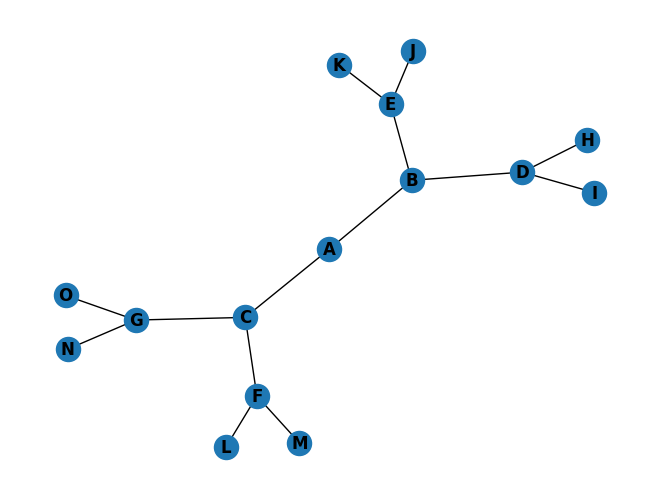

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the graph
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': ['H', 'I'],
    'E': ['J', 'K'],
    'F': ['L', 'M'],
    'G': ['N', 'O']
}

# Create a NetworkX graph object and add nodes and edges
G = nx.Graph()
for node, neighbors in graph.items():
    G.add_node(node)
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

# Draw the graph
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()


In [9]:
def iterative_deepening(start, goal, max_depth):
    for depth in range(max_depth):
        visited = set()
        result = depth_limited_search(start, goal, visited, depth)
        if result is not None:
            return result

def depth_limited_search(node, goal, visited, depth_limit):
    print(f"Visiting node {node} at depth {depth_limit}")
    if node == goal:
        return node
    elif depth_limit == 0:
        return None
    else:
        visited.add(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                result = depth_limited_search(neighbor, goal, visited, depth_limit-1)
                if result is not None:
                    return result
        return None

In [13]:
# Test the iterative_deepening function
start_node = 'A'
goal_node = 'N'
max_depth_limit = 4

result = iterative_deepening(start_node, goal_node, max_depth_limit)

if result is not None:
    print(f"Found path from {start_node} to {goal_node}: {result}")
else:
    print(f"No path found from {start_node} to {goal_node} within a depth limit of {max_depth_limit}.")

Visiting node A at depth 0
Visiting node A at depth 1
Visiting node B at depth 0
Visiting node C at depth 0
Visiting node A at depth 2
Visiting node B at depth 1
Visiting node D at depth 0
Visiting node E at depth 0
Visiting node C at depth 1
Visiting node F at depth 0
Visiting node G at depth 0
Visiting node A at depth 3
Visiting node B at depth 2
Visiting node D at depth 1
Visiting node H at depth 0
Visiting node I at depth 0
Visiting node E at depth 1
Visiting node J at depth 0
Visiting node K at depth 0
Visiting node C at depth 2
Visiting node F at depth 1
Visiting node L at depth 0
Visiting node M at depth 0
Visiting node G at depth 1
Visiting node N at depth 0
Found path from A to N: N


# Alpha-Beta pruning

*Alpha-Beta pruning is not actually a new algorithm, but rather an optimization technique for the minimax algorithm. It reduces the computation time by a huge factor. This allows us to search much faster and even go into deeper levels in the game tree. It cuts off branches in the game tree which need not be searched because there already exists a better move available. It is called Alpha-Beta pruning because it passes 2 extra parameters in the minimax function, namely alpha and beta.* [from geeksforgeeks](https://www.geeksforgeeks.org/minimax-algorithm-in-game-theory-set-4-alpha-beta-pruning/)

## Algorithm

Here is the pseudocode for the alpha-beta pruning algorithm:

```
function alphabeta(node, depth, alpha, beta, maximizingPlayer) is
    if depth = 0 or node is a terminal node then
        return the heuristic value of node
    
    if maximizingPlayer then
        v := -∞
        for each child of node do
            v := max(v, alphabeta(child, depth - 1, alpha, beta, FALSE))
            alpha := max(alpha, v)
            if beta ≤ alpha then
                break (* β cut-off *)
        return v
        
    else (* minimizing player *)
        v := +∞
        for each child of node do
            v := min(v, alphabeta(child, depth - 1, alpha, beta, TRUE))
            beta := min(beta, v)
            if beta ≤ alpha then
                break (* α cut-off *)
        return v
```

In this pseudocode, `node` is the current node being considered, `depth` is the remaining depth in the search tree, `alpha` is the best score the maximizing player has seen so far, and `beta` is the best score the minimizing player has seen so far. `maximizingPlayer` is a boolean flag that indicates whether the current player is maximizing or minimizing.

The algorithm first checks if the current node is a terminal node or if the maximum depth has been reached. If either of these conditions are true, the algorithm returns the heuristic value of the node.

If the current player is the maximizing player, the algorithm initializes `v` to negative infinity and iterates through all the child nodes of the current node, updating `v` to the maximum value found so far. It also updates the `alpha` value accordingly. If `beta` is less than or equal to `alpha`, the algorithm exits the loop (this is known as a beta cut-off). The function returns `v`.

If the current player is the minimizing player, the algorithm initializes `v` to positive infinity and iterates through all the child nodes of the current node, updating `v` to the minimum value found so far. It also updates the `beta` value accordingly. If `beta` is less than or equal to `alpha`, the algorithm exits the loop (this is known as an alpha cut-off). The function returns `v`.


## Time Complexity

The alpha-beta pruning algorithm has the same time complexity as the minimax algorithm, which is O(b^d), where b is the search tree's branching factor (i.e., the maximum number of children a node can have) and d is the search tree's maximum depth. 

Alpha-beta pruning, in contrast to minimax, can drastically cut down on the number of nodes that must be searched, so that the actual running time may be much lower than the worst-case time complexity. Depending on the topology of the search tree and the effectiveness of the heuristic function, alpha-beta pruning can reduce the number of nodes searched by a factor of 2 or more in real-world applications.


## Working of the Algorithm

Sure, here are two worked examples for Alpha-Beta Pruning:

### Example 1:
Consider the following game tree with alpha-beta pruning:

```
                       A(0,0)
                      /      \
               B(0,0)        C(0,0)
              /  |   \      /   |   \
        D(1,1) E(2,2) F(3,3) G(4,4) H(5,5)
```

Suppose we are searching for the best move for player A, and we start with an initial alpha value of negative infinity and an initial beta value of positive infinity.

1. We begin at node A and evaluate its left child, node B. Node B has two children, nodes D and E.

2. We evaluate node D with alpha = -inf and beta = inf. Since the score of node D is (1,1), we update the alpha value to 1 and return the value (1,1) to its parent, node B.

3. We evaluate node E with alpha = 1 and beta = inf. Since the score of node E is (2,2), we update the alpha value to 2 and return the value (2,2) to its parent, node B.

4. Node B now has all of its children evaluated, so we return the maximum value among them, which is (2,2), to its parent, node A. We also update the alpha value to 2.

5. We evaluate node C with alpha = 2 and beta = 2. Since node C has no children, its score is (0,0), so we return this value to its parent, node A.

6. Node A now has both of its children evaluated. Since the beta value is 2 and the score of node C is (0,0), we prune the right subtree of node A and return the score (2,2) to its parent, which is the maximum score for player A.

### Example 2:
Consider the following game tree with alpha-beta pruning:

```
                       A(0,0)
                      /      \
               B(0,0)        C(0,0)
              /  |   \      /   |   \
        D(1,1) E(2,2) F(3,3) G(4,4) H(5,5)
```

Suppose we are searching for the best move for player B, and we start with an initial alpha value of negative infinity and an initial beta value of positive infinity.

1. We begin at node B and evaluate its left child, node D. Node D has no children, so we return its score, (1,1), to its parent, node B.

2. We evaluate node E with alpha = -inf and beta = 1. Since the score of node E is (2,2), we update the alpha value to 2 and return the value (2,2) to its parent, node B.

3. Node B now has all of its children evaluated, so we return the minimum value among them, which is (1,1), to its parent, node A.

4. We evaluate node C with alpha = -inf and beta = 1. Since node C has no children, its score is (0,0), so we return this value to its parent, node A.

5. Node A now has both of its children evaluated. Since the alpha value is -inf and the score of node B is (1,1), we prune the right subtree of node A and return the score (1,1) to its parent, which is the minimum score for player B

## Example Alpha Beta pruning code

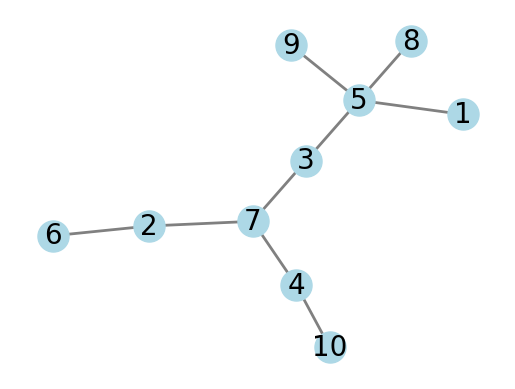

Visiting node 5, alpha=-inf, beta=inf
Visiting node 8, alpha=-inf, beta=inf
Visiting node 5, alpha=-inf, beta=inf
Visiting node 8, alpha=-inf, beta=inf
Visiting node 9, alpha=2, beta=inf
Visiting node 3, alpha=28, beta=inf
Visiting node 1, alpha=28, beta=inf
Visiting node 9, alpha=74, beta=inf
Visiting node 5, alpha=74, beta=inf
Visiting node 8, alpha=74, beta=inf
Visiting node 9, alpha=74, beta=inf
Visiting node 3, alpha=74, beta=inf
Visiting node 1, alpha=74, beta=inf
Visiting node 3, alpha=81, beta=inf
Visiting node 5, alpha=81, beta=inf
Visiting node 8, alpha=81, beta=inf
Visiting node 9, alpha=94, beta=inf
Visiting node 3, alpha=94, beta=inf
Visiting node 1, alpha=94, beta=inf
Visiting node 7, alpha=81, beta=94
Visiting node 3, alpha=81, beta=94
Visiting node 2, alpha=81, beta=94
Visiting node 4, alpha=81, beta=94
Visiting node 1, alpha=81, beta=inf
Visiting node 5, alpha=81, beta=inf
Visiting node 8, alpha=81, beta=inf
Visiting node 9, alpha=81, beta=inf
Visiting node 3, alpha=85

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def generate_tree_graph(n):
    # generate a random tree graph with n nodes
    G = nx.Graph()
    nodes = list(range(1, n+1))
    random.shuffle(nodes)
    root = nodes[0]
    G.add_node(root)
    for node in nodes[1:]:
        parent = random.choice(list(G.nodes()))
        G.add_edge(parent, node)
    return G, root

def plot_graph(G):
    # plot the graph using NetworkX and Matplotlib
    pos = nx.kamada_kawai_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
    nx.draw_networkx_labels(G, pos, font_size=20, font_color='black', font_family='sans-serif')
    nx.draw_networkx_edges(G, pos, width=2, edge_color='gray')
    plt.axis('off')
    plt.show()

def alphabeta(node, depth, alpha, beta, maximizingPlayer):
    if depth == 0 or node not in G:
        # If we have reached the maximum depth or a leaf node, return the heuristic value
        return random.randint(0, 100)

    if maximizingPlayer:
        # Maximize the score for the maximizing player
        print(f"Visiting node {node}, alpha={alpha}, beta={beta}")
        v = float('-inf')
        for child in G.neighbors(node):
            v = max(v, alphabeta(child, depth-1, alpha, beta, False))
            alpha = max(alpha, v)
            if beta <= alpha:
                # Beta cut-off
                break
        return v
    else:
        # Minimize the score for the minimizing player
        print(f"Visiting node {node}, alpha={alpha}, beta={beta}")
        v = float('inf')
        for child in G.neighbors(node):
            v = min(v, alphabeta(child, depth-1, alpha, beta, True))
            beta = min(beta, v)
            if beta <= alpha:
                # Alpha cut-off
                break
        return v

# Generate a random tree graph with 10 nodes
G, root = generate_tree_graph(10)

# Plot the graph
plot_graph(G)

# Perform alpha-beta pruning search on the graph
score = alphabeta(root, 4, float('-inf'), float('inf'), True)
print(f"Final score: {score}")


# Analysis of all 3 algorithms


1. Depth-First Search (DFS)

    a. In terms of space, DFS has an O(bm) space complexity, where b is the tree's branching factor and m is its maximum depth. To keep track of the nodes that need to be visited, it employs a stack data structure.
    
    b. Time: DFS has an O(bm) time complexity, where b is the tree's branching factor and m is its maximum depth. Before turning around, it follows a single path to the top of the tree.
    
    c. Benefits: DFS is easy to implement and has a wide range of applications. In some circumstances, it can also identify a solution rapidly and is also simple to understand.
    
    d. Drawbacks: DFS has a tendency to become caught in loops or to search a lot of irrelevant nodes. Additionally, it might not always find the best answer.

    
    
2. Iterative Deepening (ID)
    
    a. The space complexity of iterative deepening is O(bd), where b is the tree's branching factor and d is the depth of the destination node. It employs an approach to depth-limited search with increasing depth constraints.
    
    b. Time: Iterative deepening has an O(bd) time complexity, where d is the depth of the goal node and b is the branching factor of the tree. With increasing depth restrictions, it does a depth-limited search.
    
    c. Benefits: Iterative deepening, as opposed to DFS, can identify the ideal solution with less memory and time usage. Additionally, it is less likely to become caught in loops.

    d. Drawbacks: Compared to DFS and iterative deepening, alpha-beta pruning requires more complicated implementation. Additionally, it could not always come up with the best option, particularly in some challenging game conditions.

3. Alpha-Beta Pruning

    a. The space complexity of alpha-beta pruning is O(bd), where b is the tree's branching factor and d is the depth of the goal node. Pruning is used along with a min-max strategy to get rid of pointless nodes.
    
    b. temporal: Compared to DFS and iterative deepening, alpha-beta pruning has a temporal complexity of O(b(d/2)), which is significantly less. By pruning the search tree, it removes pointless nodes.
    
    c. Benefits: Alpha-beta pruning can remove unnecessary branches from the game tree, improving the effectiveness of the search. With the same amount of time and memory, it can search far further down the game tree.

    d. Drawbacks: Compared to DFS and iterative deepening, alpha-beta pruning requires more complicated implementation. Additionally, it could not always come up with the best option, particularly in some challenging game conditions.

In conclusion, iterative deepening can find the optimal solution with less memory and time requirements than DFS but still needs to explore many irrelevant nodes, alpha-beta pruning is highly efficient but requires more complex implementation and may not always find the optimal solution. DFS is simple and easy to implement, but it may not find the optimal solution. The particular problem and application needs determine the choice of algorithm.

# Chess

DFS, iterative deepening, and alpha-beta pruning are all search algorithms that can be used in the development of a chess-playing program. Here's how they can be used:

1. DFS: Depth-first search can be used to explore the possible moves from the current position in the game tree. The search algorithm would explore all the possible moves from the current position until a certain depth is reached, and then evaluate the board position at that depth. The evaluation function would return a score that represents how favorable the board position is for the current player. The algorithm would then backtrack to the previous position and explore another move. This process would continue until a certain time limit or maximum depth is reached. 

2. Iterative Deepening: Iterative deepening can be used to search for the best move within a certain time limit. The algorithm would start with a depth of 1 and perform a depth-limited search until the time limit is reached. If there is still time remaining, the algorithm would increase the depth and perform another depth-limited search. This process would continue until the time limit is reached. The algorithm would then return the best move found so far.

3. Alpha-Beta Pruning: Alpha-beta pruning can be used to improve the efficiency of the search algorithm by eliminating irrelevant branches of the game tree. The algorithm would evaluate the board position at the leaf nodes of the tree and propagate the scores up the tree to the root. When a player performs a move, the algorithm would explore all the possible responses from the opponent and use alpha-beta pruning to eliminate branches of the tree that are guaranteed to be worse than the best move found so far. This can dramatically reduce the number of positions that need to be evaluated, making the search algorithm more efficient.

In summary, these algorithms can be combined in various ways to develop a chess-playing program that can search for the best move to play based on the current board position.

# References

1. ChatGPT - https://chat.openai.com/
2. GeeksForGeeks DFS - https://www.geeksforgeeks.org/depth-first-search-or-dfs-for-a-graph/
3. GeeksForGeeks MinMax Algorithm - https://www.geeksforgeeks.org/minimax-algorithm-in-game-theory-set-4-alpha-beta-pruning/
4. Wikipedia IDDFS - https://en.wikipedia.org/wiki/Iterative_deepening_depth-first_search

# License


MIT License

Copyright (c) 2023 Makarand Madhavi

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.